In [40]:
import pandas as pd

In [41]:
from numpy import random

In [42]:
import matplotlib

In [43]:
import matplotlib.pyplot as plt

In [44]:
import seaborn as sns

In [45]:
import numpy as np

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
import sklearn.preprocessing as preprocessing

In [49]:
Location = r'adult.data.txt'

In [50]:
#Importamos el archivo con los datos y le damos nombre a las columnas
original_df = pd.read_csv(Location,
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital-Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Native-country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

In [51]:
original_df

,Age,Workclass,fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Native-country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [52]:
original_df['Native-country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [53]:
df_mod = original_df.copy()

In [54]:
#Esta funcion nos permite agrupar paises por zonas, agrupandose así en América, Asia, Europe u otros
def mapeaPaises():
   
    for i in range(len(df_mod)):
        
        pais = original_df["Native-country"][i]
    
        if  pais =='United-States' or pais =='Cuba' or pais == 'Mexico'or pais == 'Puerto-Rico' or pais =='Canada'or pais =='Columbia'or  pais =='Ecuador'or pais =='Dominican-Republic'or pais =='El-Salvador':
             df_mod.set_value(i, 'Native-country', 'America')
    
            
        elif pais =='India'or pais =='Taiwan'or pais =='Haiti'or pais =='Japan'or pais =='Hong'or pais =='China'or pais =='Iran'or pais =='Philippines':
             df_mod.set_value(i, 'Native-country', 'Asia')
        
        elif pais =='England'or pais == 'Germany'or pais =='Italy'or pais =='Poland'or pais =='Portugal'or pais =='France' or pais =='Ireland' or pais =='Greece':
                df_mod.set_value(i, 'Native-country', 'Europa')
        else:
            df_mod.set_value(i, 'Native-country', 'Otros')
        

In [55]:
#Llamamos a la función que mapea los paises
mapeaPaises()

In [56]:
#Mostramos los paises agrupados por la función anterior
df_mod['Native-country'].value_counts()

America    30406
Otros       1083
Asia         593
Europa       479
Name: Native-country, dtype: int64

In [57]:
#Observamos en el df original como estan distribuidas las razas para realizar el mapeo
original_df['Race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [58]:
#Definimos una funcion para mapear las razas y agrupamos los grupos con menos numero de personas
#para crear uno mas grande y consistente
def mapeaRazas():
   
    for i in range(len(df_mod)):
        
        raza = original_df["Race"][i]   
    
        if  raza == 'Amer-Indian-Eskimo':
             df_mod.set_value(i, 'Race', 'Other')


In [59]:
mapeaRazas()

In [60]:
#Quedan asi las razas tras realizar el mapeo
df_mod['Race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Other                   582
Name: Race, dtype: int64

In [61]:
#Previsualizamos como estan distribuidas las Workclass
original_df['Workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [62]:
#Definimos una funcion que agrupe de manera mas coherente los trabajos, agrupando los trabajos de gobierno juntos,
#los no pagados y sin trabajo juntos y por otra parte los de empleo propio
def mapeaTrabajos():
   
    for i in range(len(df_mod)):
        
        work = original_df["Workclass"][i]   
    
        if  work == 'Local-gov' or work == 'State-gov' or work == 'Federal-gov':
             df_mod.set_value(i, 'Workclass', 'Gov-appointment')
        elif work == 'Without-pay' or work == 'Never-worked':
            df_mod.set_value(i, 'Workclass', 'not-paid')
        elif work == 'Self-emp-not-inc' or work == 'Self-emp-inc':
            df_mod.set_value(i, 'Workclass', 'Self-emp')

In [63]:
mapeaTrabajos()

In [64]:
#Agrupación de Workclass tras el mapeo
df_mod['Workclass'].value_counts()

Private            22696
Gov-appointment     4351
Self-emp            3657
not-paid              21
Name: Workclass, dtype: int64

In [65]:
#Observamos como esta distribuido el Marital Status
original_df['Marital-Status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Marital-Status, dtype: int64

In [66]:
#Funcion que agrupa distintos grupos de familias, juntando los divorciados con los separados y los casados por otra parte
def mapeaFamilia():
   
    for i in range(len(df_mod)):
        
        fam = original_df['Marital-Status'][i]   
    
        if  fam == 'Married-spouse-absent' or fam == 'Married-AF-spouse' or fam == 'Married-civ-spouse':
             df_mod.set_value(i, 'Marital-Status', 'Married')
        elif fam == 'Divorced' or fam == 'Separated':
            df_mod.set_value(i, 'Marital-Status', 'Broken up')

In [67]:
mapeaFamilia()

In [68]:
#Visualización tras el mapeo
df_mod['Marital-Status'].value_counts()

Married          15417
Never-married    10683
Broken up         5468
Widowed            993
Name: Marital-Status, dtype: int64

In [69]:
df_mod

,Age,Workclass,fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Native-country,Target
0,39,Gov-appointment,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,America,<=50K
1,50,Self-emp,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,America,<=50K
2,38,Private,215646,HS-grad,9,Broken up,Handlers-cleaners,Not-in-family,White,Male,0,0,40,America,<=50K
3,53,Private,234721,11th,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,America,<=50K
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,America,<=50K
5,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,America,<=50K
6,49,Private,160187,9th,5,Married,Other-service,Not-in-family,Black,Female,0,0,16,Otros,<=50K
7,52,Self-emp,209642,HS-grad,9,Married,Exec-managerial,Husband,White,Male,0,0,45,America,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,America,>50K
9,42,Private,159449,Bachelors,13,Married,Exec-managerial,Husband,White,Male,5178,0,40,America,>50K


In [70]:
%matplotlib inline

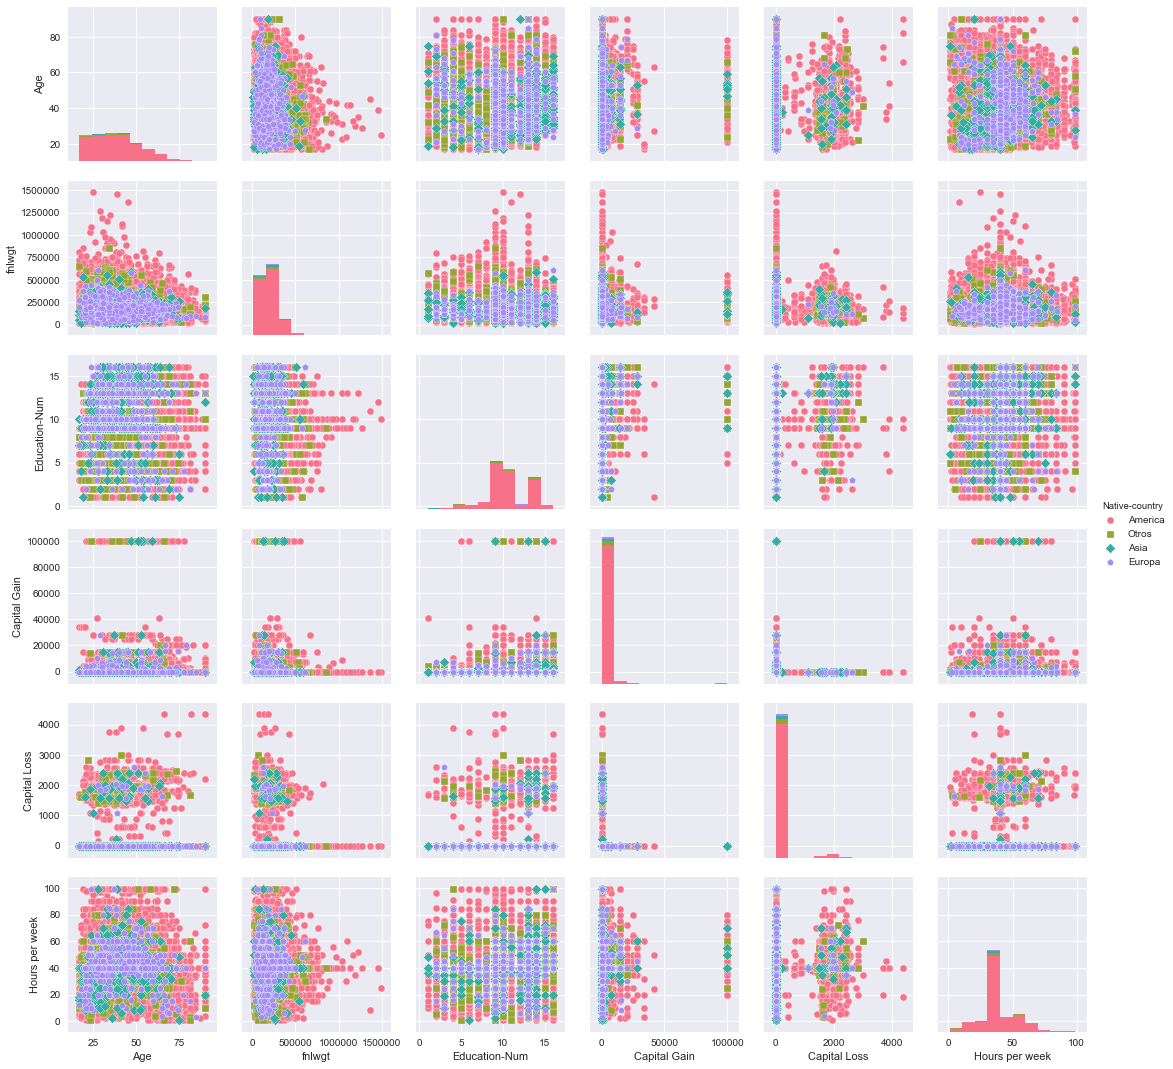

In [ ]:
#Mediante estos gráficos podemos observar los diferentes características que tiene cada continente,
#donde america se observa con circulos rojos, Asia con rombos azules, Europa con circulos morados y
#otros con cuadrados verdes. Se puede observar las diferencias que constituye cada continente segund cada feature.
sns.pairplot(df_mod, hue='Native-country', markers=["o", "s", "D", "p"], palette="husl")

In [ ]:
#Visualizamos los gráficos segun la raza, y como podemos observar predomina la raza blanca practicamente en todos
#ya que es el grupo mas grande.
sns.pairplot(df_mod, hue='Race', markers=["o", "s", "D", "p"])

In [ ]:
#Visualización por trabajos en el que claramente se observa que lo predominante es el privado
# y se manifiesta en color rojo.
sns.pairplot(df_mod, hue='Workclass', markers=["o", "s", "D", "p"])

In [ ]:
#Visualización segun el estado civil, en el que predominan los casados y no casados
sns.pairplot(df_mod, hue='Marital-Status', markers=["o", "s", "D", "p"])

In [ ]:
#Utilizamos random forest y cross validation para conseguir el mejor modelo posible que en nuestro caso ha sido 0.862
binary_data = pd.get_dummies(df_mod)

binary_data["Target"] = binary_data["Target_>50K"]
del binary_data["Target_<=50K"]
del binary_data["Target_>50K"]

X_train, X_test, y_train, y_test = cross_validation.train_test_split(binary_data[binary_data.columns.difference(["Target"])],
                                                                       binary_data["Target"], train_size=0.65)

clf = RandomForestClassifier(n_estimators=10, min_samples_split=25, random_state=5, criterion='gini')
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=5)
scores.mean() 

In [ ]:
names1=[
        "Workclass", "fnlwgt", "Education", "Education-Num", "Marital-Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Native-country", "Target"]


In [ ]:
binary_data_Age = pd.get_dummies(df_mod)

binary_data_Age["Target"] = binary_data_Age["Target_>50K"]
del binary_data_Age["Target_<=50K"]
del binary_data_Age["Target_>50K"]

X_train_Age, X_test_Age, y_train_Age, y_test_Age = cross_validation.train_test_split(binary_data_Age[binary_data.columns.difference(names1)],
                                                                       binary_data_Age["Target"], train_size=0.65)

clf_Age = RandomForestClassifier(n_estimators=10, min_samples_split=25, random_state=5, criterion='gini')
clf_Age.fit(X_train_Age, y_train_Age)
scores_Age = cross_val_score(clf_Age, X_test_Age, y_test_Age, cv=5)
scores_Age.mean() 